In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer 

### Load Libraries

In [4]:
import numpy as np
import pandas as pd

# Inverted Indexing

Associate a collection of terms (lexicon) with the documents that contain those terms.

The data structure is much more dense than a Incidence Matrix.

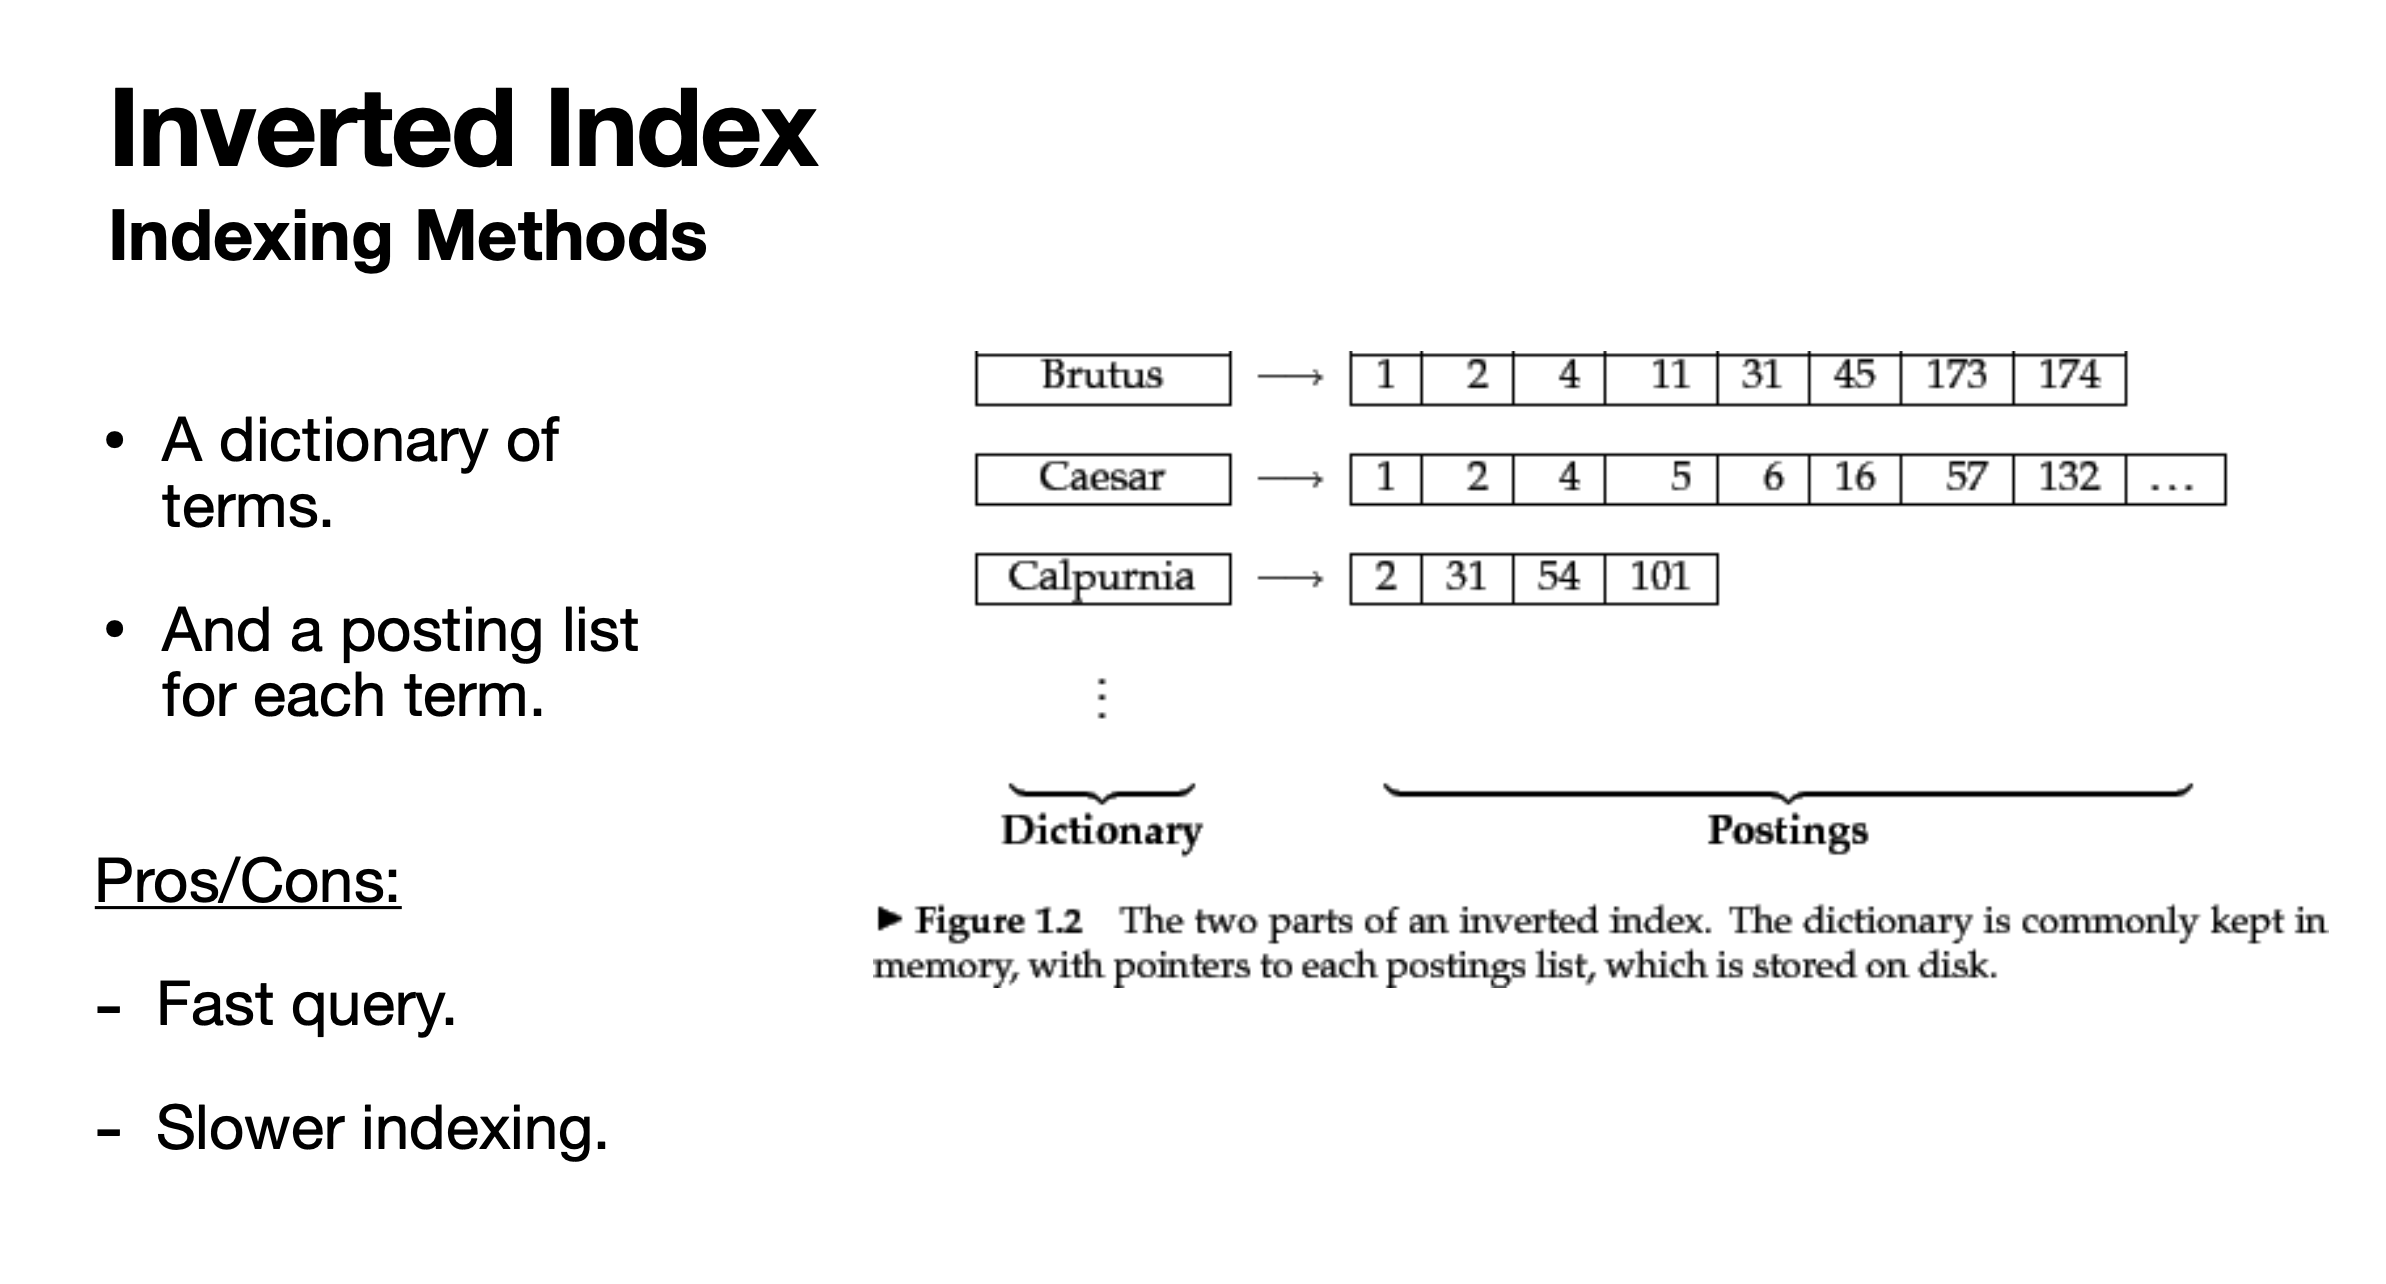

In [5]:
# Collection of documents (corpus)
lower_docs=[]
doc=[]
review=[]
sbs = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
no=['?',',','.']
review_1 = "The Glider II II is a great soccer ball played , but mk2 is the greatness ."
review_2 = "What ball is a bad soccer ball ?"
review_3 = "I am happy play with The glider , but the happiness is with want mk2 "

docs = [review_1, review_2, review_3]
for term in docs:
    lower_docs.append(term.lower())
for r in lower_docs:
    review=[]
    for term in r.split():  
        if term not in stop_words:
                review.append(sbs.stem(term))
                if term in no:
                    review.remove(term)
    doc.append(review)
doc

[['glider', 'ii', 'ii', 'great', 'soccer', 'ball', 'play', 'mk2', 'great'],
 ['ball', 'bad', 'soccer', 'ball'],
 ['happi', 'play', 'glider', 'happi', 'want', 'mk2']]

### Get the unique terms from documents

In [6]:
sorted_terms=[]
terms2=[]
terms1=[]
no_stop=[]



terms = list({term for doc in lower_docs for term in doc.split()})
for term in terms: 
    if term not in stop_words: 
        no_stop.append(term)
sorted_terms = sorted(no_stop)

for w in sorted_terms:
    if w not in no :
        terms2.append(sbs.stem(w))
sorted_terms = []
for term in terms2:
    if term not in sorted_terms:
        sorted_terms.append(term)
sorted_terms

['bad',
 'ball',
 'glider',
 'great',
 'happi',
 'ii',
 'mk2',
 'play',
 'soccer',
 'want']

In [7]:
lower_docs

['the glider ii ii is a great soccer ball played , but mk2 is the greatness .',
 'what ball is a bad soccer ball ?',
 'i am happy play with the glider , but the happiness is with want mk2 ']

## Constructing an inverted index

The ouput will be a dictionary in which the key is a term and the value is a set of doc indexes

In [8]:
# Construct an inverted index
x=[]
cc=[]
c=len(doc)
inverted_index = {}
for term in sorted_terms:
    x=[]
    cc=[]
    ccc=[]
    for j in range(c):
        
        if term in doc[j] :
            x.append(j)
        for n in doc[j]:
            if term == n:
                #cc=cc+1
                cc.append(term)
        if len(cc) !=0:
            ccc.append(len(cc))
            cc=[]
    inverted_index[term]=x,ccc
inverted_index

{'bad': ([1], [1]),
 'ball': ([0, 1], [1, 2]),
 'glider': ([0, 2], [1, 1]),
 'great': ([0], [2]),
 'happi': ([2], [2]),
 'ii': ([0], [2]),
 'mk2': ([0, 2], [1, 1]),
 'play': ([0, 2], [1, 1]),
 'soccer': ([0, 1], [1, 1]),
 'want': ([2], [1])}

In [9]:
doc

[['glider', 'ii', 'ii', 'great', 'soccer', 'ball', 'play', 'mk2', 'great'],
 ['ball', 'bad', 'soccer', 'ball'],
 ['happi', 'play', 'glider', 'happi', 'want', 'mk2']]

#### Get the posting lists for any term

In [10]:
# write a code to get the posting list of the term 'socces'
def post(term):
    i={}
    i[term]=inverted_index[term]
    return i

In [11]:
post('glider')

{'glider': ([0, 2], [1, 1])}

# HW
- And Posting: get the posting list of two terms together:
for example: i want to see what documents have the terms: 'great' and 'socces', the output should be [0]

- Or Posting: get the posting list that may have one of the two terms
for example: i want to apply or posting on terms: 'great' and 'socces', the output should be [0, 2]

- Extra: Implement some imporovements on the data processing.
such as: Removing stop words, convert all words to lower case. 

In [12]:
def and_postings(term1, term2):
    s=[]
    s1=[]
    ss=[]
    s2=[]
    sss=[]
    s=inverted_index[sbs.stem(term1)]
    s1=s[0]
    c1=len(s1)
    ss=inverted_index[sbs.stem(term2)]
    s2=ss[0]
    c2=len(s2)
    for i in range(c1):
        for j in range(c2):
            if s1[i] == s2[j]:
                sss.append(s1[i]) 
    return sss

In [13]:
and_postings('play','happy')

[2]

In [14]:
def or_postings(term1, term2):
    s=[]
    s1=[]
    ss=[]
    s2=[]
    sss=[]
    s=inverted_index[term1]
    s1=s[0]
    c1=len(s1)
    ss=inverted_index[term2]
    s2=ss[0]
    c2=len(s2)
    for i in range(c1):
        sss.append(s1[i])
    for i in range(c2):
        
        if s2[i] in sss:
            sss.remove(s2[i])
        sss.append(s2[i])
    return sss

In [15]:
or_postings('glider','soccer')

[2, 0, 1]